In [1]:
import numpy as np 
import pandas as pd

# Features Explanation
* Country : Name of country
* Region  : Region of the country
* Happiness Rank : Ranking of the country by happiness score
* Happiness Score: Happiness score
* Economy (GDP per Capita) : Contribution of GDP per capita to happiness score
* Family : Family's contribution to happiness score
* Health (Life Expectancy) : Contribution of health to happiness score
* Freedom : Contribution rate of freedom to happiness score
* Trust : Contribution rate of corruption perception to happiness score
* Generosity  : The contribution rate of generosity to happiness points

In [2]:
import shap
import sklearn
import geopandas
import numpy as np
import plotly as py
import pandas as pd
import xgboost as xgb
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.graph_objs as go
import plotly.express as px
from sklearn import metrics
from sklearn import ensemble
from sklearn import metrics 
from wordcloud import WordCloud
from sklearn import linear_model
from sklearn.cluster import KMeans
from scipy.spatial.distance import cdist
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
from plotly.offline import init_notebook_mode, iplot, plot
init_notebook_mode(connected=True)

# Data Exploration

In [4]:
import warnings
warnings.filterwarnings('ignore')

In [5]:
loc=r"C:\Users\ranje\Documents\datas\world happiness"
x = 2015
dff = []
while True:
    globals()[f'df{x}'] = pd.read_csv(f'{loc}/{x}.csv')
    dff.append(globals()[f'df{x}'])
    x += 1
    if x == 2020:
        break

In [6]:
for i, df in enumerate(dff):
    print (f'201{i+5} dataset:')
    display (dff[i].head(3))

2015 dataset:


Country          Region  Happiness Rank  Happiness Score  \
0  Switzerland  Western Europe               1            7.587   
1      Iceland  Western Europe               2            7.561   
2      Denmark  Western Europe               3            7.527   

   Standard Error  Economy (GDP per Capita)   Family  \
0         0.03411                   1.39651  1.34951   
1         0.04884                   1.30232  1.40223   
2         0.03328                   1.32548  1.36058   

   Health (Life Expectancy)  Freedom  Trust (Government Corruption)  \
0                   0.94143  0.66557                        0.41978   
1                   0.94784  0.62877                        0.14145   
2                   0.87464  0.64938                        0.48357   

   Generosity  Dystopia Residual  
0     0.29678            2.51738  
1     0.43630            2.70201  
2     0.34139            2.49204

2016 dataset:


Country          Region  Happiness Rank  Happiness Score  \
0      Denmark  Western Europe               1            7.526   
1  Switzerland  Western Europe               2            7.509   
2      Iceland  Western Europe               3            7.501   

   Lower Confidence Interval  Upper Confidence Interval  \
0                      7.460                      7.592   
1                      7.428                      7.590   
2                      7.333                      7.669   

   Economy (GDP per Capita)   Family  Health (Life Expectancy)  Freedom  \
0                   1.44178  1.16374                   0.79504  0.57941   
1                   1.52733  1.14524                   0.86303  0.58557   
2                   1.42666  1.18326                   0.86733  0.56624   

   Trust (Government Corruption)  Generosity  Dystopia Residual  
0                        0.44453     0.36171            2.73939  
1                        0.41203     0.28083            2.69463  
2                        0.14975     0.47678            2.83137

2017 dataset:


Country  Happiness.Rank  Happiness.Score  Whisker.high  Whisker.low  \
0   Norway               1            7.537      7.594445     7.479556   
1  Denmark               2            7.522      7.581728     7.462272   
2  Iceland               3            7.504      7.622030     7.385970   

   Economy..GDP.per.Capita.    Family  Health..Life.Expectancy.   Freedom  \
0                  1.616463  1.533524                  0.796667  0.635423   
1                  1.482383  1.551122                  0.792566  0.626007   
2                  1.480633  1.610574                  0.833552  0.627163   

   Generosity  Trust..Government.Corruption.  Dystopia.Residual  
0    0.362012                       0.315964           2.277027  
1    0.355280                       0.400770           2.313707  
2    0.475540                       0.153527           2.322715

2018 dataset:


Overall rank Country or region  Score  GDP per capita  Social support  \
0             1           Finland  7.632           1.305           1.592   
1             2            Norway  7.594           1.456           1.582   
2             3           Denmark  7.555           1.351           1.590   

   Healthy life expectancy  Freedom to make life choices  Generosity  \
0                    0.874                         0.681       0.202   
1                    0.861                         0.686       0.286   
2                    0.868                         0.683       0.284   

   Perceptions of corruption  
0                      0.393  
1                      0.340  
2                      0.408

2019 dataset:


Overall rank Country or region  Score  GDP per capita  Social support  \
0             1           Finland  7.769           1.340           1.587   
1             2           Denmark  7.600           1.383           1.573   
2             3            Norway  7.554           1.488           1.582   

   Healthy life expectancy  Freedom to make life choices  Generosity  \
0                    0.986                         0.596       0.153   
1                    0.996                         0.592       0.252   
2                    1.028                         0.603       0.271   

   Perceptions of corruption  
0                      0.393  
1                      0.410  
2                      0.341

# Data Cleaning

In [7]:
df2015.rename(columns = {'Economy (GDP per Capita)' : 'GDP',
                        'Health (Life Expectancy)' : 'Life',
                        'Trust (Government Corruption)' : 'Trust'}, inplace = True)

In [8]:
df2016.rename(columns = {'Economy (GDP per Capita)' : 'GDP',
                        'Health (Life Expectancy)' : 'Life',
                        'Trust (Government Corruption)' : 'Trust'}, inplace = True)

In [9]:
df2017.rename(columns = {'Happiness.Rank' : 'Happiness Rank',
                        'Happiness.Score' : 'Happiness Score',
                        'Economy..GDP.per.Capita.' : 'GDP',
                        'Health..Life.Expectancy.' : 'Life',
                        'Dystopia.Residual' : 'Dystopia Residual',
                        'Trust..Government.Corruption.' : 'Trust'}, inplace = True)

In [10]:
df2018.rename(columns = {'Overall rank' : 'Happiness Rank',
                        'Score' : 'Happiness Score',
                        'Country or region' : 'Country',
                        'Social support' : 'Family',
                        'Freedom to make life choices' : 'Freedom',
                        'GDP per capita' : 'GDP',
                        'Healthy life expectancy' : 'Life',
                        'Perceptions of corruption' : 'Trust'}, inplace = True)

In [11]:
df2019.rename(columns = {'Overall rank' : 'Happiness Rank',
                        'Score' : 'Happiness Score',
                        'Country or region' : 'Country',
                        'Social support' : 'Family',
                        'Freedom to make life choices' : 'Freedom',
                        'GDP per capita' : 'GDP',
                        'Healthy life expectancy' : 'Life',
                        'Perceptions of corruption' : 'Trust'}, inplace = True)

In [14]:
for i, df in enumerate(dff, 2015):
    df['Year'] = i

In [15]:
for df in dff:
    if not ('Region') in df:
        df['Region'] = None
        temp = df.set_index('Country').Region.fillna(df2015.set_index('Country').Region).reset_index()
        df.fillna(temp, inplace = True)

In [16]:
for i, df in enumerate(dff, 2015):
    print ('\n' f'df{i} dataset:' '\n', df.isnull().sum())


df2015 dataset:
 Country              0
Region               0
Happiness Rank       0
Happiness Score      0
Standard Error       0
GDP                  0
Family               0
Life                 0
Freedom              0
Trust                0
Generosity           0
Dystopia Residual    0
Year                 0
dtype: int64

df2016 dataset:
 Country                      0
Region                       0
Happiness Rank               0
Happiness Score              0
Lower Confidence Interval    0
Upper Confidence Interval    0
GDP                          0
Family                       0
Life                         0
Freedom                      0
Trust                        0
Generosity                   0
Dystopia Residual            0
Year                         0
dtype: int64

df2017 dataset:
 Country              0
Happiness Rank       0
Happiness Score      0
Whisker.high         0
Whisker.low          0
GDP                  0
Family               0
Life                 0
Fre

In [17]:
fuldf = pd.concat(dff)

# Data Visualisation

In [20]:
df2015 = pd.read_csv(r"C:\Users\ranje\Documents\datas\world happiness\2015.csv")
df2015.drop("Standard Error", axis=1,inplace=True)
df2015["Year"] = 2015
df2015.columns = ["Country","Region","Happiness Rank","Happiness Score","GDP","Family","Life","Freedom","Trust","Generosity","Dystopia Residual","Year"]

df2016 = pd.read_csv(r"C:\Users\ranje\Documents\datas\world happiness\2016.csv")
df2016.drop(["Lower Confidence Interval", "Upper Confidence Interval"],axis=1,inplace=True)
df2016["Year"] = 2016
df2016.columns=["Country", "Region", "Happiness Rank", "Happiness Score", "GDP", "Family", "Life", "Freedom", "Trust", "Generosity", "Dystopia Residual", "Year"]

df2017 = pd.read_csv(r"C:\Users\ranje\Documents\datas\world happiness\2017.csv")
df2017.drop(["Whisker.high","Whisker.low"],axis=1,inplace=True)
df2017["Year"]= 2017
df2017.columns=["Country", "Happiness Rank", "Happiness Score", "GDP", "Family", "Life", "Freedom","Generosity", "Trust", "Dystopia Residual", "Year"]


country_region = df2015[["Country","Region"]]
country_region = country_region.to_numpy()

def make_region(Country):
    for i in range(len(country_region)):
        if Country == country_region[i][0]:
            return country_region[i][1]
    
    return "no_region"

df2017["Region"] = df2017["Country"].apply(make_region)

df2017.loc[32,"Region"] = 'Eastern Asia'
df2017.loc[49,"Region"] = 'Latin America and Caribbean'
df2017.loc[70,"Region"] = 'Eastern Asia'
df2017.loc[92,"Region"] = 'Sub-Saharan Africa'
df2017.loc[110,"Region"] = 'Sub-Saharan Africa'
df2017.loc[146,"Region"] =  'Sub-Saharan Africa'

df2018 = pd.read_csv(r"C:\Users\ranje\Documents\datas\world happiness\2018.csv")
df2018["Year"] =2018
df2018.columns = [ "Happiness Rank","Country", "Happiness Score", "GDP", "Family", "Life", "Freedom","Generosity", "Trust", "Year"]
df2018["Dystopia Residual"] = df2018["Happiness Score"] - df2018["GDP"] - df2018["Family"] - df2018["Life"] - df2018["Freedom"] - df2018["Generosity"] - df2018["Trust"]
df2018["Region"] = df2018["Country"].apply(make_region)
df2018.loc[37,"Region"] = 'Latin America and Caribbean'
df2018.loc[48,"Region"] = 'Latin America and Caribbean'
df2018.loc[57,"Region"] = 'Central and Eastern Europe'
df2018.loc[97,"Region"] = 'Sub-Saharan Africa'
df2018.loc[118,"Region"] = 'Sub-Saharan Africa'
df2018.loc[153,"Region"] = 'Sub-Saharan Africa'

df2019 =pd.read_csv(r"C:\Users\ranje\Documents\datas\world happiness\2019.csv")
df2019["Year"] = 2019
df2019.columns =[ "Happiness Rank","Country", "Happiness Score", "GDP", "Family", "Life", "Freedom","Generosity", "Trust", "Year"]
df2019["Dystopia Residual"] = df2019["Happiness Score"] - df2019["GDP"] - df2019["Family"] - df2019["Life"] - df2019["Freedom"] - df2019["Generosity"] - df2019["Trust"]
df2019["Region"] = df2019["Country"].apply(make_region)
df2019.loc[38,"Region"] = 'Latin America and Caribbean'
df2019.loc[63,"Region"] = 'Central and Eastern Europe'
df2019.loc[83,"Region"] = 'Central and Eastern Europe'
df2019.loc[111,"Region"] = 'Sub-Saharan Africa'
df2019.loc[112,"Region"] = 'Sub-Saharan Africa'
df2019.loc[119,"Region"] = 'Sub-Saharan Africa'
df2019.loc[155,"Region"] = 'Sub-Saharan Africa'

In [22]:
df_tmp = fuldf.groupby(["Region","Year"])["Happiness Score"].mean()
df_tmp = pd.DataFrame(df_tmp).unstack()
df_tmp = df_tmp.reset_index()
df_tmp.columns=["Region","2015","2016","2017","2018","2019"]
df_tmp = df_tmp.melt("Region")
fig = px.bar(df_tmp.sort_values(by="value"), x="Region", y="value",animation_frame='variable',text="value",color="Region",
             height=600,title = 'Change in the happiness rate of regions by years')
fig.update_traces(texttemplate='%{text:.2f}',textposition='auto')
fig.update_layout(transition = {'duration': 1000})
fig.show()

In [23]:
df_1 = pd.concat([df2015.melt(id_vars=['Country','Year','Happiness Score','Happiness Rank','Region']),
                 df2016.melt(id_vars=['Country','Year','Happiness Score','Happiness Rank','Region']),],ignore_index=True)
fig = px.bar(df_1[df_1["Happiness Rank"] <=10].sort_values(by="Happiness Score"), y="Country", x="value", color='variable',animation_frame='Year',
             height=700,title="Happiness Change Between 2015-2016",opacity=.2,text="value")
fig.update_traces(texttemplate='%{text:.2f}',textposition='auto')
fig.update_layout(transition = {'duration': 1000})
fig.show()

In [24]:
df_2 = pd.concat([df2016.melt(id_vars=['Country','Year','Happiness Score','Happiness Rank','Region']),
                 df2017.melt(id_vars=['Country','Year','Happiness Score','Happiness Rank','Region']),],ignore_index=True)
fig = px.bar(df_2[df_2["Happiness Rank"] <=10].sort_values(by="Happiness Score"), y="Country", x="value", color='variable',animation_frame='Year',
             height=700,title="Change in Happiness Between 2016-2017",opacity=.2,text="value")
fig.update_traces(texttemplate='%{text:.2f}',textposition='auto')
fig.update_layout(transition = {'duration': 1000})
fig.show()

In [26]:
df1 = pd.read_csv(r"C:\Users\ranje\Documents\datas\world happiness\2015.csv")

In [27]:
df2 = pd.read_csv(r"C:\Users\ranje\Documents\datas\world happiness\2016.csv")

In [28]:
df3 = pd.read_csv(r"C:\Users\ranje\Documents\datas\world happiness\2017.csv")

In [29]:
df4 = pd.read_csv(r"C:\Users\ranje\Documents\datas\world happiness\2018.csv")

In [30]:
df5 = pd.read_csv(r"C:\Users\ranje\Documents\datas\world happiness\2019.csv")

In [31]:
import plotly.express as px
happiest_countries = fuldf.groupby(['Country'], sort = False)['Happiness Score', 'Year', 'GDP'].max()
top10 = happiest_countries.sort_values('Happiness Score', ascending = False)[:15]
fig = px.scatter(top10,
                x = top10.index,
                y = 'Happiness Score',
                size = 'GDP',
                color = top10.index,
                template = 'xgridoff',
                animation_frame = 'Year',
                title = '15 Happiest Countries')
fig.show()

In [32]:
df2015 = df1.iloc[:20,:]
df2016 = df2.iloc[:20,:]
df2017 = df3.iloc[:20,:]
df2018 = df4.iloc[:20,:]
df2019 = df5.iloc[:20,:]

import plotly.graph_objs as go
v1 =go.Scatter(
                    x = df2015['Country'],
                    y = df2015['Happiness Score'],
                    mode = "markers",
                    name = "2015",
                    marker = dict(color = 'red'),
                    text= df2015.Country)

v2 =go.Scatter(
                    x = df2015['Country'],
                    y = df2016['Happiness Score'],
                    mode = "markers",
                    name = "2016",
                    marker = dict(color = 'green'),
                    text= df2016.Country)

v3 =go.Scatter(
                    x = df2015['Country'],
                    y = df2017['Happiness.Score'],
                    mode = "markers",
                    name = "2017",
                    marker = dict(color = 'blue'),
                    text= df2017.Country)


v4 =go.Scatter(
                    x = df2015['Country'],
                    y = df2018['Score'],
                    mode = "markers",
                    name = "2018",
                    marker = dict(color = 'black'),
                    text= df2017.Country)


v5 =go.Scatter(
                    x = df2015['Country'],
                    y = df2019['Score'],
                    mode = "markers",
                    name = "2019",
                    marker = dict(color = 'pink'),
                    text= df2017.Country)


data = [v1, v2, v3, v4, v5]
layout = dict(title = 'Change of happiness rate among the top 20 countries by years',
              xaxis= dict(title= 'Country',ticklen= 5,zeroline= False),
              yaxis= dict(title= 'Happiness',ticklen= 5,zeroline= False),
              hovermode="x unified"
             )
fig = dict(data = data, layout = layout)
iplot(fig)

In [33]:
data = dict(
        type = 'choropleth',
        colorscale = 'Viridis',
         marker_line_width=1,
        locations = df1['Country'],
        locationmode = "country names",
        z = df1['Happiness Score'],
        text = df1['Country'],
        colorbar = {'title' : 'Happiness Score'},
        
      )
layout = dict(title = ' World Happiness Map 2015',
              geo = dict(projection = {'type':'mercator'}, showocean = False, showlakes = True, showrivers = True, )
             )
choromap = go.Figure(data = [data],layout = layout)
iplot(choromap,validate=False)

In [34]:
data = dict(
        type = 'choropleth',
        colorscale = 'Viridis',
         marker_line_width=1,
        locations = df2['Country'],
        locationmode = "country names",
        z = df2['Happiness Score'],
        text = df2['Country'],
        colorbar = {'title' : 'Happiness Score'},
        
      )
layout = dict(title = 'World Happiness Map 2016',
              geo = dict(projection = {'type':'mercator'}, showocean = False, showlakes = True, showrivers = True, )
             )
choromap = go.Figure(data = [data],layout = layout)
iplot(choromap,validate=False)

In [35]:
data = dict(
        type = 'choropleth',
        colorscale = 'Viridis',
         marker_line_width=1,
        locations = df3['Country'],
        locationmode = "country names",
        z = df3['Happiness.Score'],
        text = df3['Country'],
        colorbar = {'title' : 'Happiness Score'},
        
      )
layout = dict(title = ' World Happiness Map 2017',
              geo = dict(projection = {'type':'mercator'}, showocean = False, showlakes = True, showrivers = True, )
             )
choromap = go.Figure(data = [data],layout = layout)
iplot(choromap,validate=False)

In [36]:
fuldf['Happiness Change'] = (df5['Score'] - df1['Happiness Score']) / df1['Happiness Score']
temp = fuldf[np.abs(fuldf['Happiness Change']) > 0.01]
temp = fuldf.sort_values('Happiness Change')
temp['Year'] = temp['Year'].astype(str)
fig = px.bar(temp,
             x = 'Happiness Change',
             y = 'Country',
             color = 'Year',
             orientation = 'h',
             height = 900,
             template = 'gridon',
             title = 'Change in happiness rate between 2015-2017')
fig.show()

In [37]:
fig = px.scatter(fuldf,
                x = 'GDP',
                y = 'Happiness Score',
                size = 'Freedom',
                color = 'Country',
                template = 'xgridoff',
                animation_frame = 'Year',
                title = 'GDP * Happiness Rate for 2015 - 2019 and bubble Contribution of Freedom to Happiness rate') 
fig.show()

In [38]:
fig = px.scatter(fuldf,
                x = 'Life',
                y = 'Happiness Score',
                size = 'GDP',
                color = 'Country',
                template = 'xgridoff',
                animation_frame = 'Year',
                labels = {'Life': 'Life Expectancy'},
                title = 'Contribution of Health * Happiness rate and bubbles to GDP happiness rate between 2015 - 2019 ')
fig.show()

In [40]:
import plotly.express as px

df2015 = pd.read_csv(r'C:\Users\ranje\Documents\datas\world happiness\2015.csv')
df = df2015

fig = px.sunburst(df, path=['Region', 'Country'], values='Happiness Score',
                  color='Happiness Score', hover_data=['Happiness Rank'],
                  color_continuous_scale='RdBu',
                  color_continuous_midpoint=np.average(df['Happiness Score'], weights=df['Happiness Score']))
fig.update_layout(hovermode="x unified")
fig.show()

In [41]:
fuldf.drop(labels=['Upper Confidence Interval'],axis=1,inplace=True)
fuldf.drop(labels=['Dystopia Residual'],axis=1,inplace=True)
fuldf.drop(labels=['Whisker.high'],axis=1,inplace=True)
fuldf.drop(labels=['Whisker.low'],axis=1,inplace=True)
fuldf.drop(labels=['Standard Error'],axis=1,inplace=True)  

In [42]:
fuldf.drop(labels=['Lower Confidence Interval'],axis=1,inplace=True)

<AxesSubplot:>

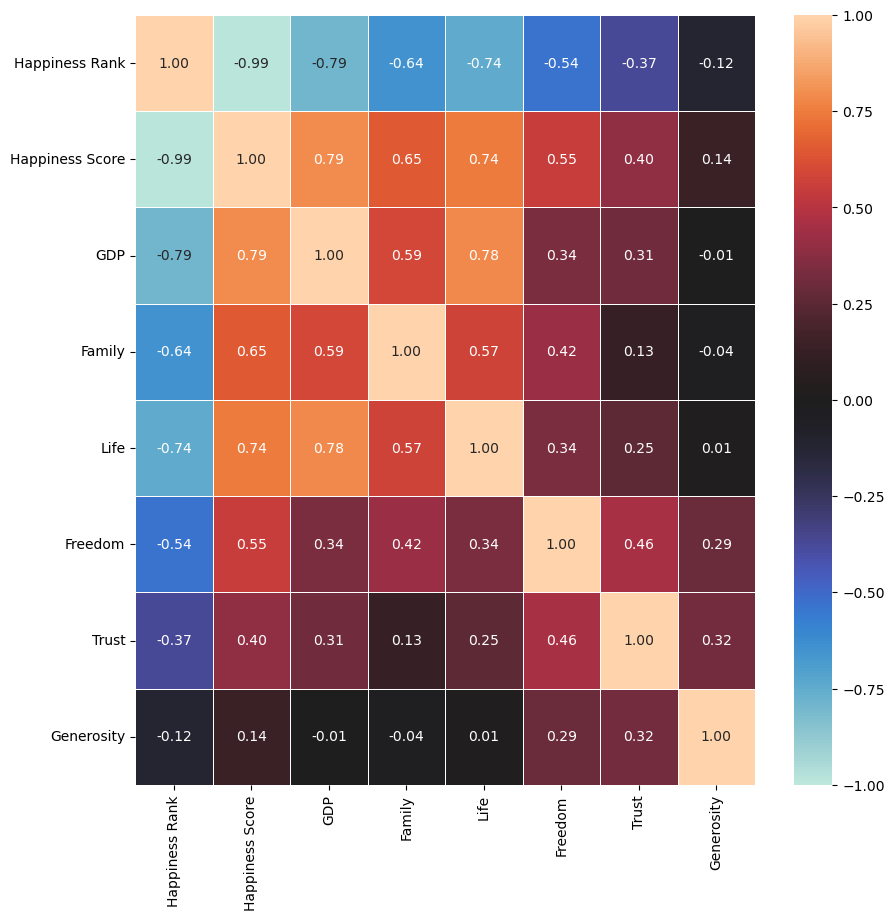

In [43]:
fig = plt.figure(figsize=(10,10))

ax1 = plt.subplot(1,1,1)

sns.heatmap(fuldf.iloc[:,0:10].corr(), annot=True, fmt=".2f", linewidths=.5,vmin=-1, vmax=1, center= 0,ax=ax1) 

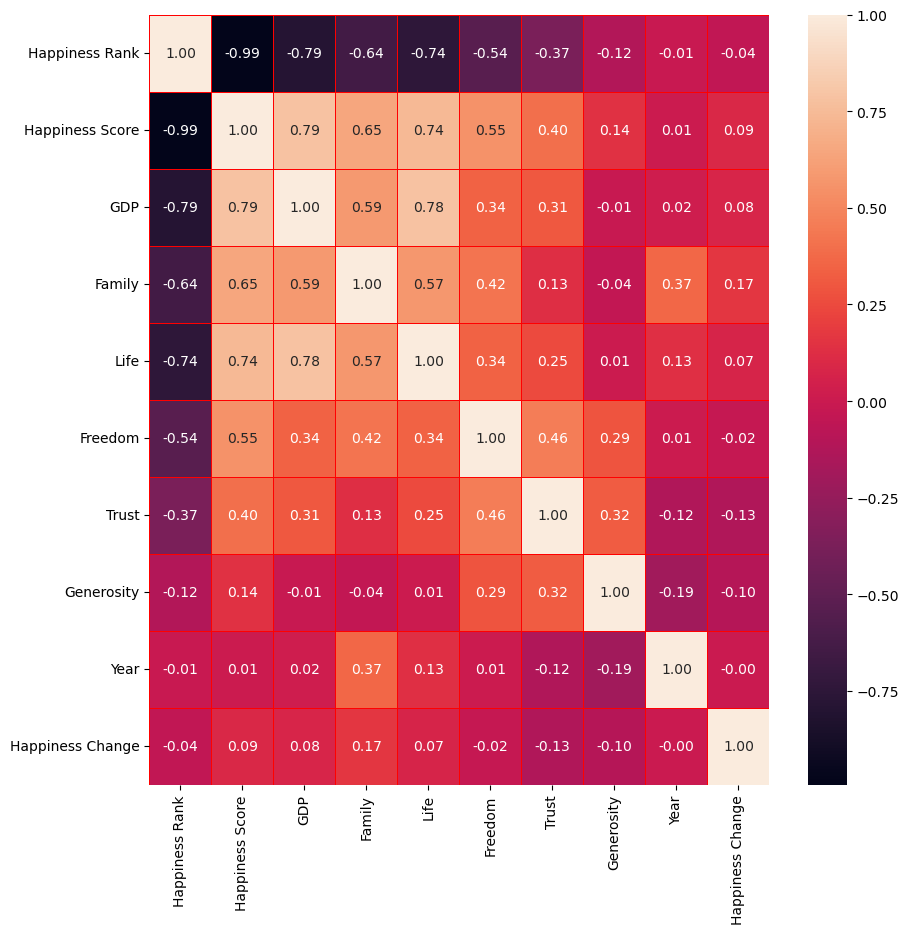

In [45]:
f,ax = plt.subplots(figsize=(10, 10))
sns.heatmap(fuldf.corr(), annot=True, linewidths=0.5,linecolor="red", fmt= '.2f',ax=ax)
plt.show()

In [46]:
import plotly.figure_factory as ff
z = pd.DataFrame(fuldf.corr().values.tolist())
z = z.round(2).values.tolist()
fig = ff.create_annotated_heatmap(z, x = fuldf.corr().columns.tolist(), y = fuldf.corr().columns.tolist(), colorscale = 'Portland')
fig.update_layout(title = {'text': 'Correlation Heatmap', 'y' : 0.93, 'x' : 0.5}, title_font_size = 25)
fig.show()

<AxesSubplot:xlabel='Freedom', ylabel='Country'>

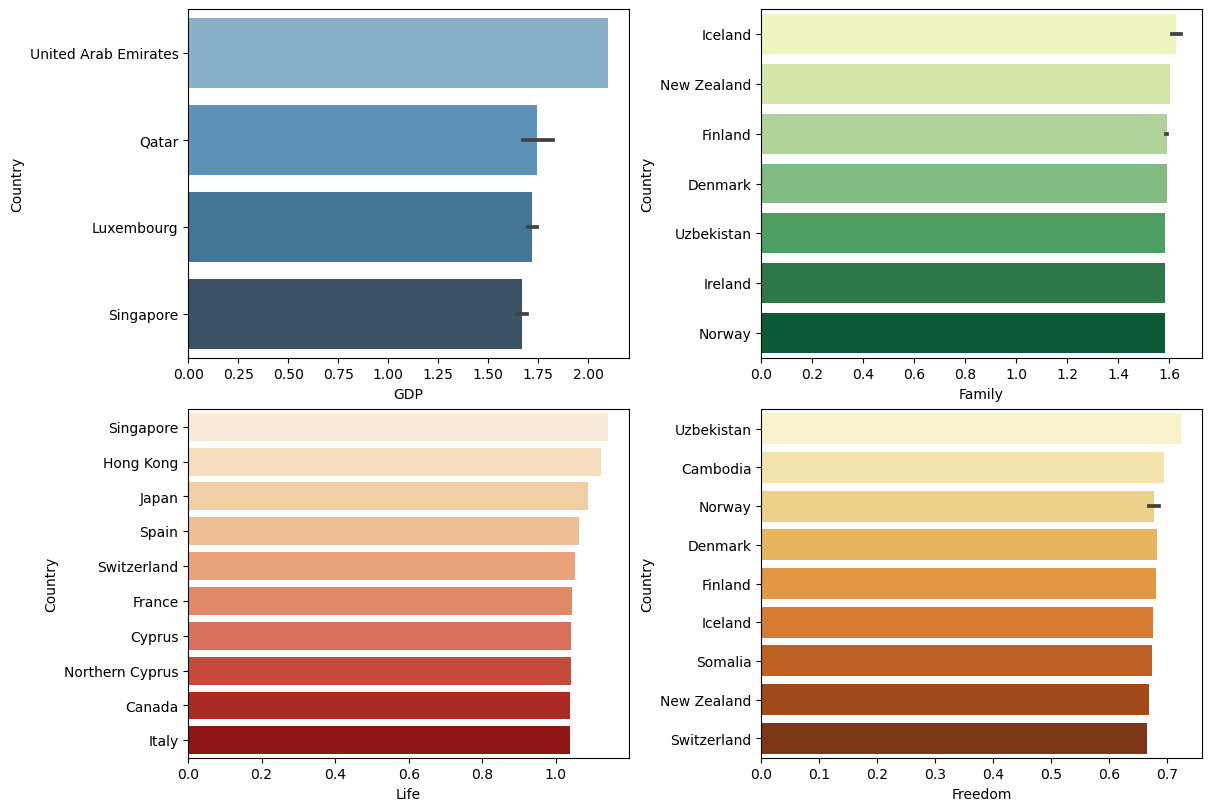

In [47]:
fig, axes = plt.subplots(nrows=2, ncols=2,constrained_layout=True,figsize=(12,8))

sns.barplot(x='GDP',y='Country',data=fuldf.nlargest(10,'GDP'),ax=axes[0,0],palette="Blues_d")

sns.barplot(x='Family' ,y='Country',data=fuldf.nlargest(10,'Family'),ax=axes[0,1],palette="YlGn")

sns.barplot(x='Life' ,y='Country',data=fuldf.nlargest(10,'Life'),ax=axes[1,0],palette='OrRd')

sns.barplot(x='Freedom' ,y='Country',data=fuldf.nlargest(10,'Freedom'),ax=axes[1,1],palette='YlOrBr')

<AxesSubplot:xlabel='Trust', ylabel='Country'>

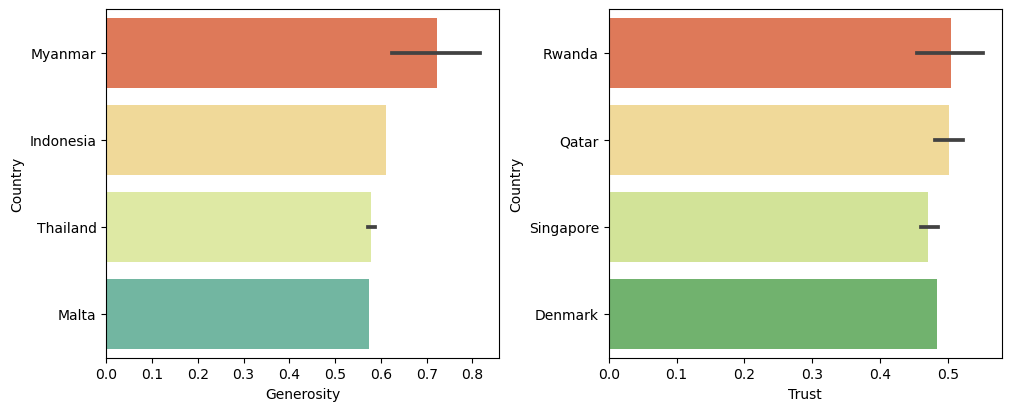

In [48]:
fig, axes = plt.subplots(nrows=1, ncols=2,constrained_layout=True,figsize=(10,4))

sns.barplot(x='Generosity' ,y='Country',data=fuldf.nlargest(10,'Generosity'),ax=axes[0],palette='Spectral')
sns.barplot(x='Trust' ,y='Country',data=fuldf.nlargest(10,'Trust'),ax=axes[1],palette='RdYlGn')

Categorically sorting and distinguishing the attributes in the data.

In [49]:
fuldf.tail()

Country              Region  Happiness Rank  \
151                    Rwanda  Sub-Saharan Africa             152   
152                  Tanzania  Sub-Saharan Africa             153   
153               Afghanistan       Southern Asia             154   
154  Central African Republic  Sub-Saharan Africa             155   
155               South Sudan                 NaN             156   

     Happiness Score    GDP  Family   Life  Freedom  Trust  Generosity  Year  \
151            3.334  0.359   0.711  0.614    0.555  0.411       0.217  2019   
152            3.231  0.476   0.885  0.499    0.417  0.147       0.276  2019   
153            3.203  0.350   0.517  0.361    0.000  0.025       0.158  2019   
154            3.083  0.026   0.000  0.105    0.225  0.035       0.235  2019   
155            2.853  0.306   0.575  0.295    0.010  0.091       0.202  2019   

     Happiness Change  
151         -0.070532  
152         -0.096224  
153         -0.075613  
154         -0.076946  
155         -0.050898

In [50]:
fuldf = fuldf.rename(columns = {'Happiness Score': 'Score' })
fuldf['Trust'].fillna(value=fuldf['Trust'].mean(),inplace=True)
fuldf['Happiness Change'].fillna(value=fuldf['Happiness Change'].mean(),inplace=True)

In [51]:
fulldf=pd.concat(dff)
fulldf = fulldf.rename(columns = {'Happiness Score': 'Score' })
fulldf=fulldf[['Country','Score','Region','GDP']]
fulldf

Country  Score              Region      GDP
0                 Switzerland  7.587      Western Europe  1.39651
1                     Iceland  7.561      Western Europe  1.30232
2                     Denmark  7.527      Western Europe  1.32548
3                      Norway  7.522      Western Europe  1.45900
4                      Canada  7.427       North America  1.32629
..                        ...    ...                 ...      ...
151                    Rwanda  3.334  Sub-Saharan Africa  0.35900
152                  Tanzania  3.231  Sub-Saharan Africa  0.47600
153               Afghanistan  3.203       Southern Asia  0.35000
154  Central African Republic  3.083  Sub-Saharan Africa  0.02600
155               South Sudan  2.853                 NaN  0.30600

[782 rows x 4 columns]

In [52]:
fulldf=fulldf.groupby(['Country']).mean().reset_index()
fulldf

Country    Score       GDP
0    Afghanistan  3.51280  0.357113
1        Albania  4.71260  0.938633
2        Algeria  5.66760  1.012963
3         Angola  3.87225  0.798380
4      Argentina  6.45940  1.111035
..           ...      ...       ...
165    Venezuela  5.53140  1.052468
166      Vietnam  5.15460  0.723416
167        Yemen  3.62580  0.489313
168       Zambia  4.58440  0.571761
169     Zimbabwe  4.00660  0.344051

[170 rows x 3 columns]

In [54]:
print('max:',fulldf['Score'].max())
print('min:',fulldf['Score'].min())
abc=fulldf['Score'].max()-fulldf['Score'].min()
scr=round(abc/3,3)
print('The difference:',(scr))

max: 7.5459999671936036
min: 3.078999994277954
The difference: 1.489


In [55]:
low=fulldf['Score'].min()+scr
medium=low+scr

print('low scr upper limit',low)
print('upper border of middle scr',medium)
print('upper limit of high scr','max:',fulldf['Score'].max())

low scr upper limit 4.567999994277954
upper border of middle scr 6.0569999942779535
upper limit of high scr max: 7.5459999671936036


In [57]:
row=[]
for i in fulldf.Score:
    if(i>0 and i<low):
        row.append('Low')
        
        
    elif(i>low and i<medium):
         row.append('Medium')
    else:
         row.append('High')

fulldf['Category']=row 

In [58]:
color = (fulldf.Category == 'High' ).map({True: 'background-color: red ',False:'background-color: yellow',True: 'background-color: limegreen'})
fulldf.reset_index(drop=True).style.apply(lambda s: color)

In [59]:
world = geopandas.read_file(geopandas.datasets.get_path('naturalearth_lowres'))

In [60]:
fulldf = world.merge(fulldf, how="left", left_on=['name'], right_on=['Country'])

<AxesSubplot:title={'center':'5 Year Average Happiness Categories'}>

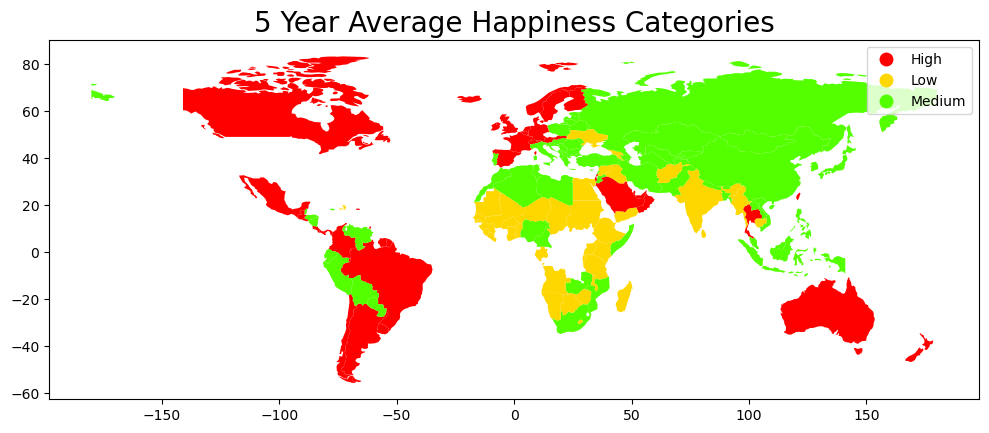

In [61]:
fig, ax = plt.subplots(figsize  = (12, 8))
ax.set_title("5 Year Average Happiness Categories", fontsize=20)
fulldf.plot(column='Category',ax=ax,legend=True,cmap='prism')

In [62]:
df_tr = df_tr = fuldf["Country"]=="India"
fuldf[df_tr]

Country         Region  Happiness Rank  Score       GDP    Family  \
116   India  Southern Asia             117  4.565  0.644990  0.381740   
117   India  Southern Asia             118  4.404  0.740360  0.292470   
121   India  Southern Asia             122  4.315  0.792221  0.754373   
132   India  Southern Asia             133  4.190  0.721000  0.747000   
139   India  Southern Asia             140  4.015  0.755000  0.765000   

         Life   Freedom     Trust  Generosity  Year  Happiness Change  
116  0.515290  0.397860  0.084920    0.264750  2015         -0.003724  
117  0.450910  0.402850  0.087220    0.250280  2016         -0.003516  
121  0.455428  0.469987  0.092227    0.231538  2017         -0.004876  
132  0.485000  0.539000  0.093000    0.172000  2018          0.018815  
139  0.588000  0.498000  0.085000    0.200000  2019          0.014914

In [63]:
df_turkey = fuldf[fuldf["Country"] =="India"]
fig = px.line(df_turkey, x='Year', y='Happiness Rank', color='Country')
fig.update_layout(
    yaxis = dict(autorange="reversed")
)
fig.show()

In [68]:
df_filter = (fuldf['Country']=="India")| (fuldf['Country']=="Sri Lanka") | (fuldf["Country"]=="Paksitan") | (fuldf["Country"]=="Nepal")
fuldf[df_filter]


Country         Region  Happiness Rank  Score       GDP    Family  \
116      India  Southern Asia             117  4.565  0.644990  0.381740   
120      Nepal  Southern Asia             121  4.514  0.359970  0.864490   
131  Sri Lanka  Southern Asia             132  4.271  0.835240  1.019050   
106      Nepal  Southern Asia             107  4.793  0.446260  0.696990   
116  Sri Lanka  Southern Asia             117  4.415  0.973180  0.847830   
117      India  Southern Asia             118  4.404  0.740360  0.292470   
98       Nepal  Southern Asia              99  4.962  0.479820  1.179283   
119  Sri Lanka  Southern Asia             120  4.440  1.009850  1.259976   
121      India  Southern Asia             122  4.315  0.792221  0.754373   
100      Nepal  Southern Asia             101  4.880  0.425000  1.228000   
115  Sri Lanka  Southern Asia             116  4.471  0.918000  1.314000   
132      India  Southern Asia             133  4.190  0.721000  0.747000   
99       Nepal  Southern Asia             100  4.913  0.446000  1.226000   
129  Sri Lanka  Southern Asia             130  4.366  0.949000  1.265000   
139      India  Southern Asia             140  4.015  0.755000  0.765000   

         Life   Freedom     Trust  Generosity  Year  Happiness Change  
116  0.515290  0.397860  0.084920    0.264750  2015         -0.003724  
120  0.568740  0.382820  0.059070    0.322960  2015         -0.001108  
131  0.708060  0.537260  0.091790    0.408280  2015          0.018497  
106  0.500730  0.370120  0.070080    0.381600  2016         -0.004220  
116  0.620070  0.508170  0.079640    0.469780  2016         -0.003724  
117  0.450910  0.402850  0.087220    0.250280  2016         -0.003516  
98   0.504131  0.440306  0.072976    0.394096  2017          0.013946  
119  0.625131  0.561213  0.073654    0.490864  2017         -0.000221  
121  0.455428  0.469987  0.092227    0.231538  2017         -0.004876  
100  0.539000  0.526000  0.078000    0.302000  2018          0.008013  
115  0.672000  0.585000  0.050000    0.307000  2018         -0.002625  
132  0.485000  0.539000  0.093000    0.172000  2018          0.018815  
99   0.677000  0.439000  0.089000    0.285000  2019          0.008002  
129  0.831000  0.470000  0.047000    0.244000  2019          0.016058  
139  0.588000  0.498000  0.085000    0.200000  2019          0.014914

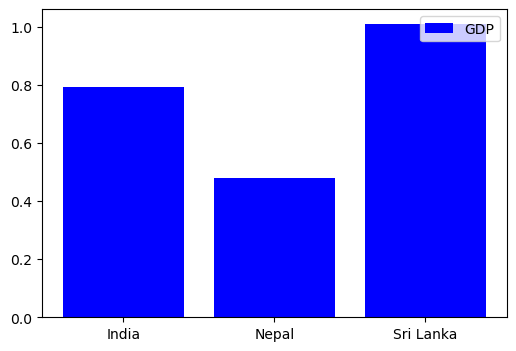

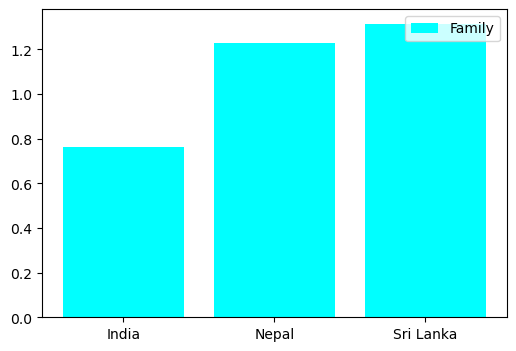

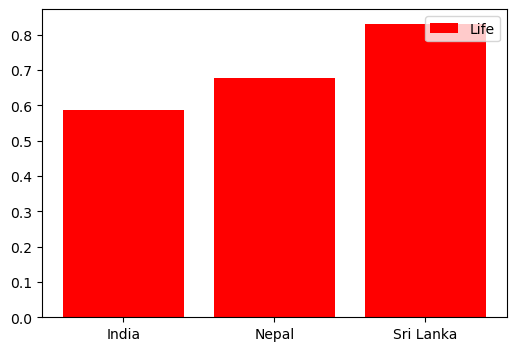

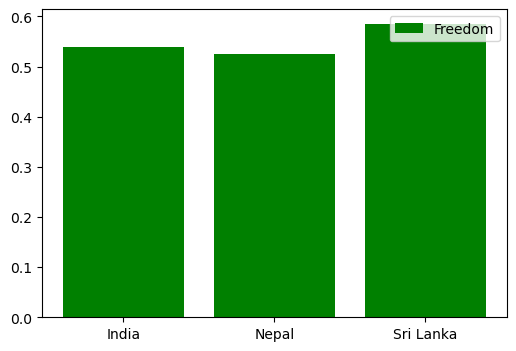

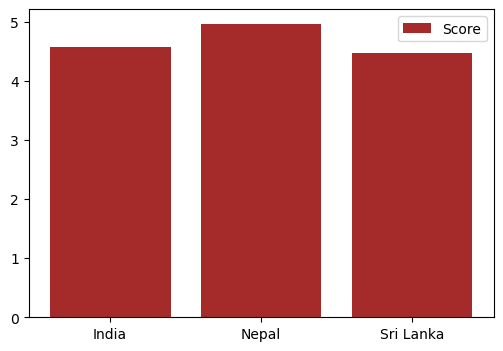

In [69]:
countries = [i for i in fuldf[df_filter]["Country"]]

features = ["GDP","Family","Life","Freedom","Score"]

colors = ["Blue","Cyan","Red","Green","Brown","Pink"]

features_colors = list(zip(features,colors))

def barplot_creator(country_list,feature_color_list,fuldf):
    for f,c in feature_color_list:
        _,ax = plt.subplots(figsize = (6,4))
        ax.bar(country_list,fuldf[f],color=c,label=f)
        plt.legend(loc = "upper right")
        plt.show()
        

barplot_creator(countries,features_colors,fuldf[df_filter])

In [70]:
df_hapy = fuldf.pivot_table(index=["Country","Year"],values="Score")
df_hapy = df_hapy.unstack()
df_hapy = df_hapy.reset_index()
df_hapy.columns = ["Country","2015","2016","2017","2018","2019"]
df_hapy  = df_hapy.dropna()
df_hapy  = df_hapy.reset_index(drop=True)
for i in range(len(df_hapy)):
    df_hapy.loc[i,"min"] = min(df_hapy.loc[i,"2015"],df_hapy.loc[i,"2016"],df_hapy.loc[i,"2017"],df_hapy.loc[i,"2018"],df_hapy.loc[i,"2019"])

for i in range(len(df_hapy)):
    df_hapy.loc[i,"max"] = max(df_hapy.loc[i,"2015"],df_hapy.loc[i,"2016"],df_hapy.loc[i,"2017"],df_hapy.loc[i,"2018"],df_hapy.loc[i,"2019"])

for i in range(len(df_hapy)):
    df_hapy.loc[i,"difference"] = df_hapy.loc[i,"max"]-df_hapy.loc[i,"min"]

In [71]:
df_hapy.sort_values(by="difference",ascending=False).head(2)

Country  2015   2016   2017   2018   2019    min    max  difference
136  Venezuela  6.81  6.084  5.250  4.806  4.707  4.707  6.810       2.103
12       Benin  3.34  3.484  3.657  4.141  4.883  3.340  4.883       1.543

In [73]:
df_venezuela = fuldf[fuldf["Country"] =="Venezuela"]

fig = px.bar(df_venezuela,x="Year",y="Score",color="Score",text="Score",title="Venezuela's Declining Happiness")
fig.update_traces(texttemplate='%{text:.2f}',textposition='auto')
fig.show()

In [74]:
df_Benin = fuldf[fuldf["Country"]=="Benin"]
fig = px.bar(df_Benin,x="Year",y="Score",color="Score",text="Score",title="Benin's happiness boost")
fig.update_traces(texttemplate='%{text:.2f}',textposition='auto')
fig.show()

# Machine Learning

In [75]:
X = fuldf.drop(['Score', 'Happiness Rank', 'Country','Region'],axis=1)
y = fuldf['Score']

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=0)

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

# Linear Model

In [77]:
lm = linear_model.LinearRegression()
lm.fit(X_train,y_train)
y_pred = lm.predict(X_test)

sonuc_lm = pd.DataFrame({
    'Real':y_test,
    'Guess':y_pred
})
sonuc_lm['Difference'] = y_test - y_pred
sonuc_lm.head()

Real     Guess  Difference
67   5.525  5.704931   -0.179931
17   6.886  6.544874    0.341126
36   6.344  6.285846    0.058154
14   7.119  6.730779    0.388221
145  3.781  4.465686   -0.684686

Mean Absolute Error: 0.43748750182443696
Mean Squared Error: 0.3058819391400655
Root Mean Squared Error: 0.5530659446576561
R^2 of train set0.7716222268487614
R^2 of test set0.7702006025207904


<AxesSubplot:xlabel='Real', ylabel='Guess'>

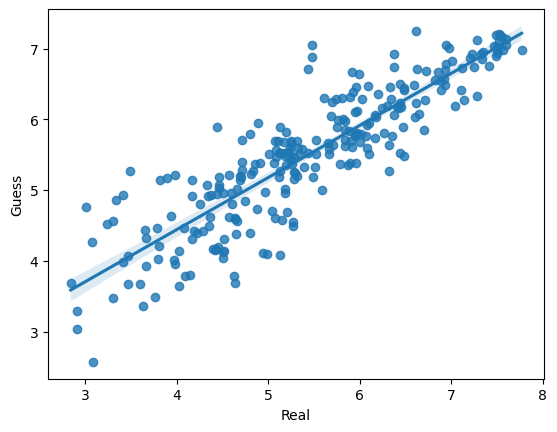

In [78]:
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
print(f"R^2 of train set{lm.score(X_train, y_train)}")
print(f"R^2 of test set{lm.score(X_test, y_test)}")
sns.regplot(x='Real',y='Guess',data=sonuc_lm)

In [79]:
 print(cross_val_score(lm,X,y,cv=5))

[0.69196491 0.66409249 0.782165   0.78638843 0.76929833]


In [80]:
scores = cross_val_score(lm,X_train,y_train,scoring='neg_mean_absolute_error',cv=10)
print("MAE(mean):%",scores.mean())

MAE(mean):% -0.4239677432696853


# Random Forest Regressor

In [81]:
rf = ensemble.RandomForestRegressor()
rf.fit(X_train,y_train)
y_pred = rf.predict(X_test)

conc_rf = pd.DataFrame({
    'Real':y_test,
    'Guess':y_pred
})
conc_rf['Difference'] = y_test - y_pred
conc_rf.head()

Real    Guess  Difference
67   5.525  5.53619    -0.01119
17   6.886  6.70520     0.18080
36   6.344  6.25915     0.08485
14   7.119  7.06842     0.05058
145  3.781  3.67704     0.10396

Mean Absolute Error: 0.30662984237918606
Mean Squared Error: 0.26925812160263973
Root Mean Squared Error: 0.5189008783984083
R^2 of train set0.9795804321464968
R^2 of test set0.7977149148307929


<AxesSubplot:xlabel='Real', ylabel='Guess'>

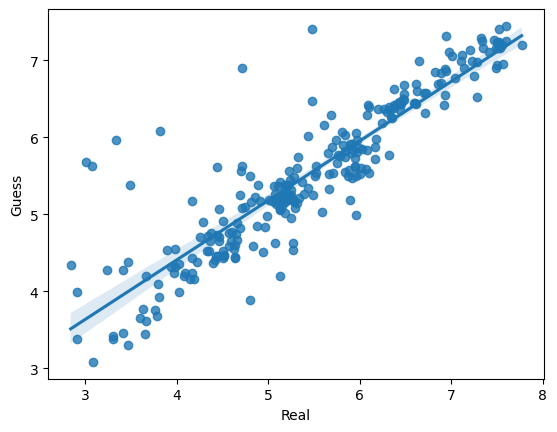

In [82]:
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
print(f"R^2 of train set{rf.score(X_train, y_train)}")
print(f"R^2 of test set{rf.score(X_test, y_test)}")

sns.regplot(x='Real',y='Guess',data=conc_rf)

In [83]:
print(cross_val_score(rf,X,y,cv=5))

[0.83143057 0.82853994 0.89387262 0.91326822 0.75487371]


In [84]:
scores_1 = cross_val_score(rf,X_train,y_train,scoring='neg_mean_absolute_error',cv=10)
print("MAE(mean):%",scores_1.mean())

MAE(mean):% -0.2984464189207806


In [85]:
parameters = {
    'n_estimators': [100, 150, 200, 250, 300],
    'max_depth': [1,2,3,4],
}
regr = ensemble.RandomForestRegressor(random_state=0)

clf = GridSearchCV(regr, parameters)
clf.fit(X_train, y_train)

GridSearchCV(estimator=RandomForestRegressor(random_state=0),
             param_grid={'max_depth': [1, 2, 3, 4],
                         'n_estimators': [100, 150, 200, 250, 300]})

In [86]:
y_pred_train = clf.predict(X_train)
metrics.mean_squared_error(y_train, y_pred_train)

0.14708025472512928

In [87]:
y_pred = clf.predict(X_test)
metrics.mean_squared_error(y_test, y_pred)

0.3273087929626632

# XGBoot

In [88]:
regressor=xgb.XGBRegressor(eval_metric='rmsle')
param_grid = {"max_depth":    [4, 5],
              "n_estimators": [500, 600, 700],
              "learning_rate": [0.01, 0.015]}
search = GridSearchCV(regressor, param_grid, cv=5).fit(X_train, y_train)

print("Top Hyperparameters ",search.best_params_)

Top Hyperparameters  {'learning_rate': 0.015, 'max_depth': 5, 'n_estimators': 600}


In [89]:
regressor=xgb.XGBRegressor(learning_rate = search.best_params_["learning_rate"],
                           n_estimators  = search.best_params_["n_estimators"],
                           max_depth     = search.best_params_["max_depth"],)

regressor.fit(X_train, y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.015, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=5, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=600, n_jobs=None, num_parallel_tree=None,
             predictor=None, random_state=None, ...)

In [90]:
predictions = regressor.predict(X_test)

In [92]:
conc_xg = pd.DataFrame({
    'Real':y_test,
    'Guess':y_pred
})
conc_xg['Difference'] = y_test - y_pred
conc_xg.head()

Real     Guess  Difference
67   5.525  5.408232    0.116768
17   6.886  6.603935    0.282065
36   6.344  6.416158   -0.072158
14   7.119  6.917168    0.201832
145  3.781  3.573327    0.207673

Mean Absolute Error: 0.38669905638668967
Mean Squared Error: 0.3273087929626632
Root Mean Squared Error: 0.5721090743579088
R^2 of train set0.9823933920700194
R^2 of test set0.8465150838658638


<AxesSubplot:xlabel='Real', ylabel='Guess'>

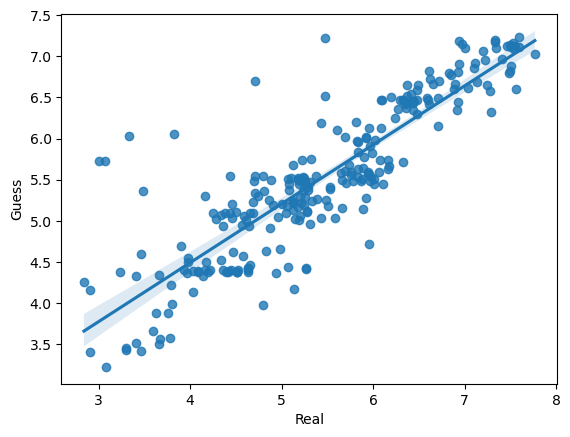

In [93]:
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
print(f"R^2 of train set{regressor.score(X_train, y_train)}")
print(f"R^2 of test set{regressor.score(X_test, y_test)}")

sns.regplot(x='Real',y='Guess',data=conc_xg)

In [94]:
scores = cross_val_score(regressor, X, y, cv=5, scoring='neg_root_mean_squared_error')

print("Average Score 0.2%f Standard Deviation of 0.2%f" % (scores.mean(), scores.std()))

Average Score 0.2-0.463195 Standard Deviation of 0.20.097922


In [95]:
print(cross_val_score(regressor,X,y,cv=5))

[0.85452933 0.7232328  0.88296658 0.90600994 0.75015425]


# MODEL EXPLAINABILITY

In [96]:
regressor = ensemble.RandomForestRegressor()
regressor.fit(X_train, y_train);

In [97]:

explainer = shap.TreeExplainer(regressor)

shap_values = explainer.shap_values(X_train)

In [98]:
features_1 = X.columns

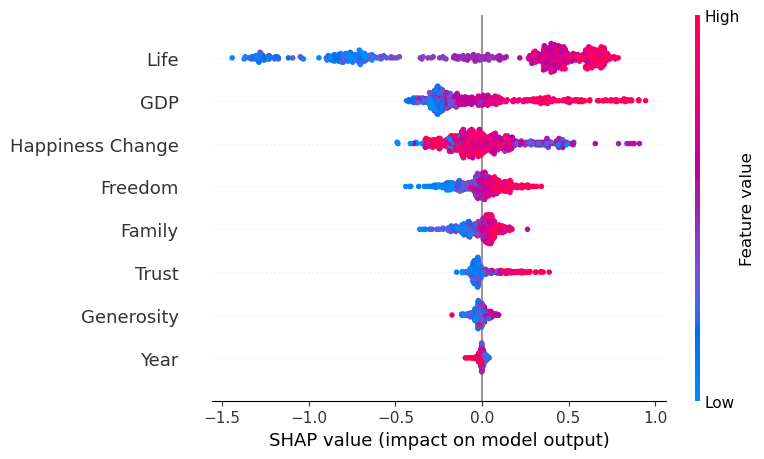

In [99]:
shap.summary_plot(shap_values, X_train, feature_names=X.columns)

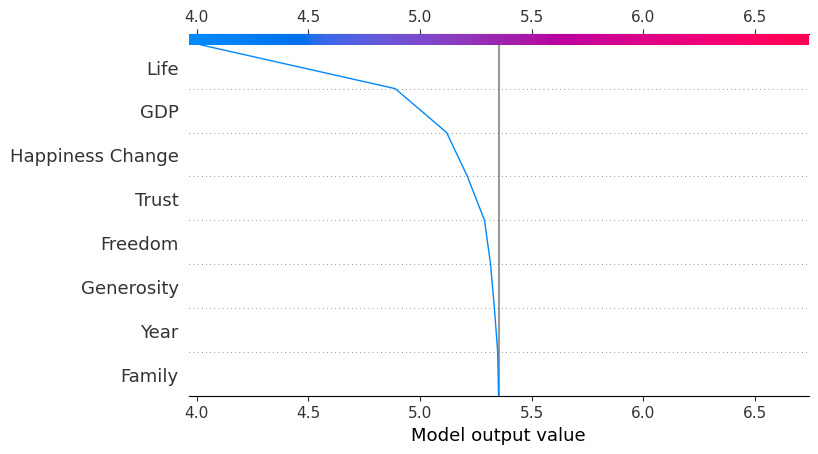

In [100]:
shap.decision_plot(explainer.expected_value[0], shap_values[0], feature_names = list(features_1))

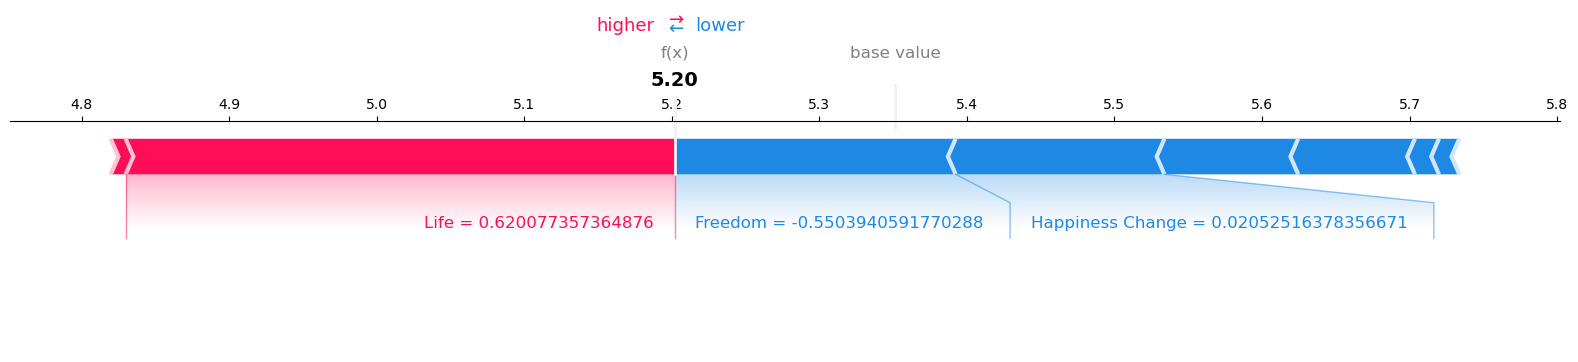

In [101]:
i = 18
shap.force_plot(explainer.expected_value, shap_values[i], X_test[i], feature_names = features_1,matplotlib=True)

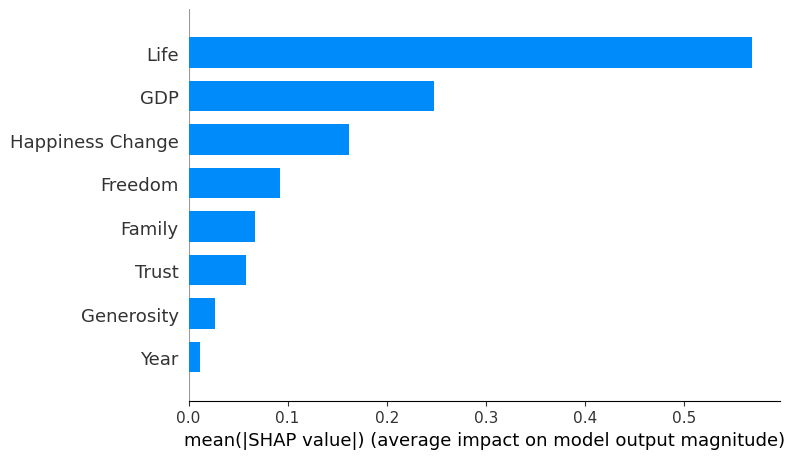

In [102]:
shap.summary_plot(shap_values,X, plot_type="bar")

In [103]:
Explainer = shap.TreeExplainer(rf)

In [104]:
shap.initjs()

In [105]:
shap_interaction_values = shap.TreeExplainer(rf).shap_interaction_values(X.iloc[:2000,:])

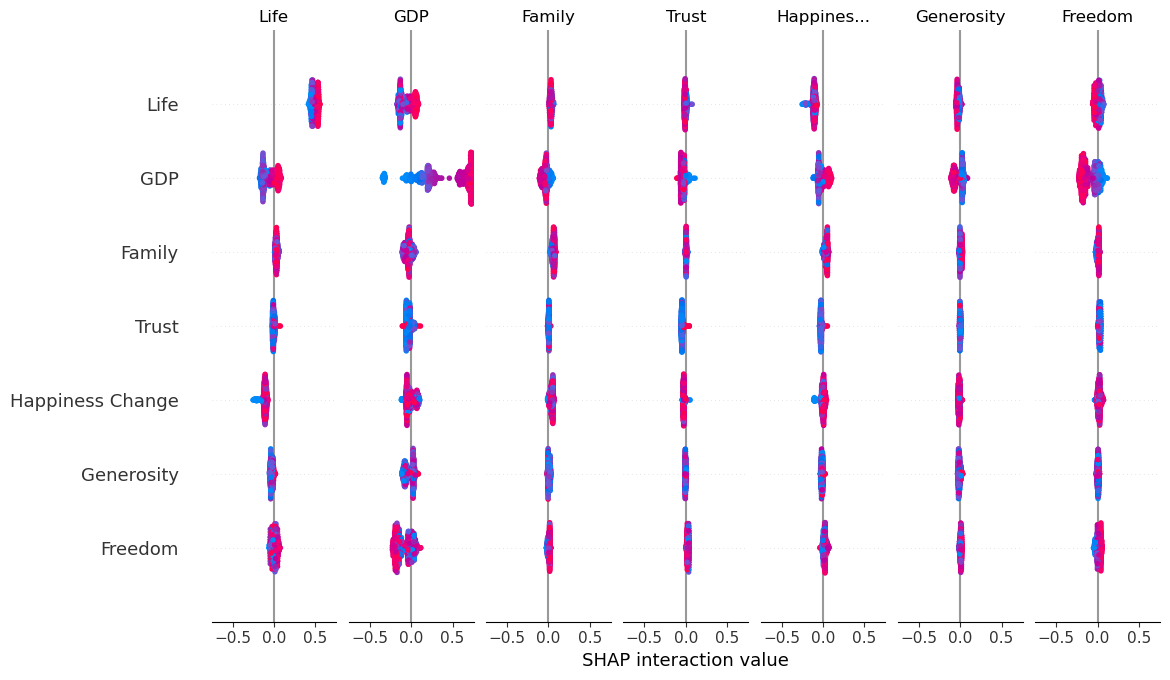

In [106]:
shap.summary_plot(shap_interaction_values, X.iloc[:2000,:])

In [107]:
explainer1 = shap.TreeExplainer(rf)
shap_values1 = explainer1.shap_values(X)

In [108]:
shap.force_plot(explainer1.expected_value, shap_values1[:1000,:], X.iloc[:1000,:])

## Clustering

In [109]:
labels = KMeans(2, random_state=0).fit_predict(X)
fuldf['labels'] = labels
tsne_data  = fuldf.drop(['Country', 'Region', 'Happiness Rank', 'Year', 'Happiness Change'],axis=1)
tsne_data["labels"] = tsne_data["labels"].astype(str)

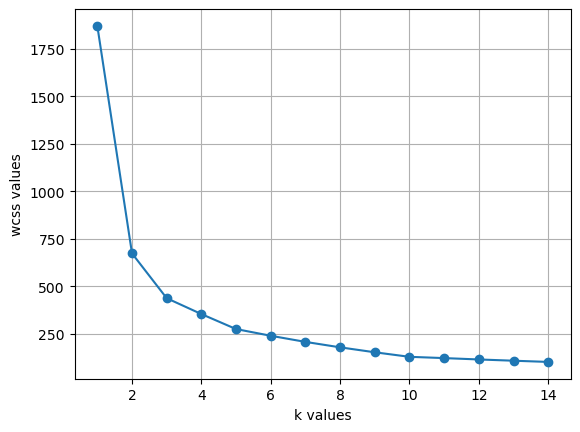

In [110]:
wcss=[]
for i in range(1,15):
    km=KMeans(n_clusters=i)
    km.fit(X)
    wcss.append(km.inertia_)

plt.plot(range(1,15),wcss,"-o")
plt.grid(True)
plt.xlabel("k values")
plt.ylabel("wcss values")
plt.show()

In [111]:
X_1  = fuldf.drop(['Score', 'Happiness Rank', 'Country', 'Region','Trust','Freedom','Family','Generosity','Happiness Change','Year','labels'],axis=1)

In [112]:
df_2=fuldf.copy()
km2=KMeans(n_clusters=2)
clusters=km2.fit_predict(X_1)
df_2["clusters"]=clusters




df_1=fuldf.copy()
km1=KMeans(n_clusters=3)
clusters=km1.fit_predict(X_1)
df_1["clusters"]=clusters

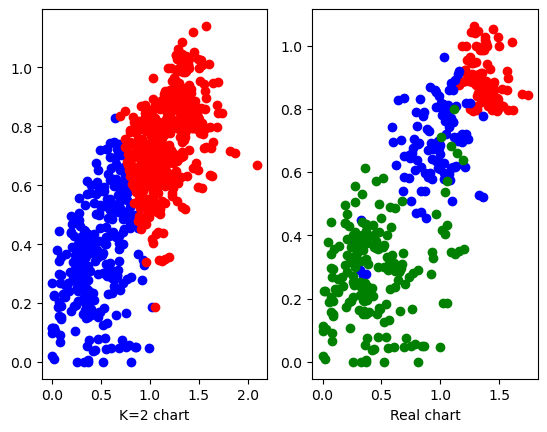

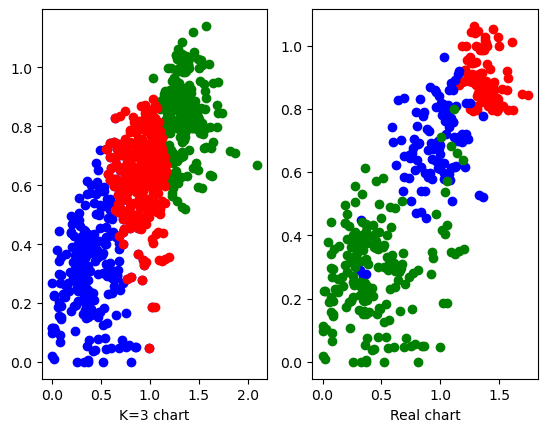

In [113]:
plt.subplot(1,2,1)
plt.scatter(df_2["GDP"][df_2.clusters==0],
            df_2["Life"][df_2.clusters==0],color="b")

plt.scatter(df_2["GDP"][df_2.clusters==1],
            df_2["Life"][df_2.clusters==1],color="r")
plt.xlabel("K=2 chart")

plt.subplot(1,2,2)
plt.scatter(fuldf["GDP"][fuldf.Region=="Western Europe"],
            fuldf["Life"][fuldf.Region=="Western Europe"],color="r")

plt.scatter(fuldf["GDP"][fuldf.Region=="Latin America and Caribbean"],
            fuldf["Life"][fuldf.Region=="Latin America and Caribbean"],color="b")

plt.scatter(fuldf["GDP"][fuldf.Region=="Sub-Saharan Africa"],
            fuldf["Life"][fuldf.Region=="Sub-Saharan Africa"],color="g")
plt.xlabel("Real chart")
plt.show()




plt.subplot(1,2,1)
plt.scatter(df_2["GDP"][df_2.clusters==0],
            df_2["Life"][df_2.clusters==0],color="b")

plt.scatter(df_1["GDP"][df_1.clusters==1],
            df_1["Life"][df_1.clusters==1],color="g")

plt.scatter(df_1["GDP"][df_1.clusters==2],
            df_1["Life"][df_1.clusters==2],color="r")
plt.xlabel("K=3 chart")

plt.subplot(1,2,2)
plt.scatter(fuldf["GDP"][fuldf.Region=="Western Europe"],
            fuldf["Life"][fuldf.Region=="Western Europe"],color="r")

plt.scatter(fuldf["GDP"][fuldf.Region=="Latin America and Caribbean"],
            fuldf["Life"][fuldf.Region=="Latin America and Caribbean"],color="b")

plt.scatter(fuldf["GDP"][fuldf.Region=="Sub-Saharan Africa"],
            fuldf["Life"][fuldf.Region=="Sub-Saharan Africa"],color="g")
plt.xlabel("Real chart")
plt.show()